# Revisión del álgebra compleja básica y fasores

Este notebook sirve como material para la clase de grupos reducidos

### Evaluar el siguiente número complejo: 
$$\jmath^3  \left( \frac{2 + \jmath}{2 - 3 \jmath} \right)^{\ast} + \sqrt{3 +\jmath} + {e}^{\jmath 45^o} + 6 \angle 30^o$$

En Python se puede trabajar con complejos de forma sencilla y directa. Para usar funciones como la exponencial o la raíz cuadrada necesitamos cargar el paquete `math` y/o el paquete `numpy`. Pero usando `numpy`, además de tener todas las funciones matemáticas, podemos aplicarlas a los arrays de `numpy`. Por esta razón vamos a usar siempre el paquete `numpy`.

Importamos el paquete con la orden `import`, nombre del paquete y el alias (usado para llamar a los comandos del paquete sin necesidad de escribir el nombre del paquete completo).

In [1]:
import numpy as np

Vamos a ir analizando cada término del ejemplo y ver cómo se implementa.

Para el primer término, $\jmath^3$, la unidad imaginaria en Python se escribe como `1j` o `1.j`. Otro número complejo, que tenga parte real e imaginaria se escribe como `3+2j`, por ejemplo.

La parte real e imaginaria de un complejo se obtiene como atributo del objeto de la clase `complex`.

In [2]:
p1= 1j**3
print('j**3=',p1,'\nj**2=',1.j**2,\
      '\nPartes real e imaginaria de j**3: ',p1.real, p1.imag)

j**3= (-0-1j) 
j**2= (-1+0j) 
Partes real e imaginaria de j**3:  -0.0 -1.0


Para el siguiente término, $\left( \frac{2 + \jmath}{2 - 3 \jmath} \right)^{\ast}$, hay que evaluar el complejo conjugado, que en Python se hace con la función `np.conjugate`.

Podemos comprobar como el conjugado de un cociente es el cociente de los conjugados. 

In [3]:
p2= np.conjugate((2+1j)/(2-3j))
p2n=2+1j
p2d=2-3j
print(p2,np.conjugate(p2n)/np.conjugate(p2d))

(0.07692307692307691-0.6153846153846154j) (0.07692307692307691-0.6153846153846154j)


El primer sumando, $\jmath^3  \left( \frac{2 + \jmath}{2 - 3 \jmath} \right)^{\ast}$, se obtiene sin más que multiplicar `p1` por  `p2`. 
En Python no hay que declarar el tipo de variables. La suma, resta, producto y división se hacen de forma automática tanto para reales como para complejos.

Podemos comprobar que el producto de dos números complejos es el producto de módulos (función `abs`), y la fase (función `np.angle`) es la suma de las fases. Las fases las hemos pasado a grados en lugar de radianes que es la unidad en que se expresa la función `np.angle`.

In [3]:
np.angle(-1+2j)*180/np.pi

116.56505117707799

In [4]:
np.arctan(-2)*180/np.pi

-63.43494882292202

In [7]:
np.angle(2-1j)*180/np.pi

-26.56505117707799

In [5]:
np.angle(-2+1j)*180/np.pi

153.43494882292202

In [30]:
s1= p1*p2
print(s1)
print(abs(s1),abs(p1),abs(p2),np.angle(s1)*180/np.pi,\
      np.angle(p1)*180/np.pi,np.angle(p2)*180/np.pi)

(-0.615384615385-0.0769230769231j)
0.620173672946 1.0 0.620173672946 -172.874983651 -90.0 -82.8749836511


El siguiente término, $\sqrt{3 +\jmath}$, corresponde a la raíz cuadrada de un número complejo. En Python se hace de forma natural, aplicando la regla de la raíz de un complejo es la raíz del módulo y la fase se divide entre 2.

In [5]:
s2= np.sqrt(3+1j)
print(s2, abs(s2),np.angle(s2)*180/np.pi)
print(abs(3+1j), np.angle(3+1j)*180/np.pi)

(1.755317301824428+0.28484878459314106j) 1.7782794100389228 9.217474411461005
3.1622776601683795 18.43494882292201


Los dos últimos sumandos del problema corresponden a diferentes formas de expresar un complejo en forma polar, es decir, con módulo y fase. En primer sumando, ${e}^{\jmath 45^o}$ tiene módulo unidad y fase $45^o$, mientras que el segundo, $6 \angle 30^o$ es la forma habitual de expresar el complejo con módulo 6 y fase $30^o$ en teoría de circuitos.

Podemos comprobar que se cumple la identidad de Euler: $c e^{\jmath d}=c (\cos(d)+\jmath \sin(d))$.
Obsérvese que para usar la fase, tanto en la exponencial como en las funciones trigonométricas, hay que pasarla a radianes.

In [41]:
s3= np.exp(1j*45*np.pi/180)
s4= 6*np.exp(1j*30*np.pi/180)
print(s3, np.cos(45*np.pi/180)+1.j*np.sin(45*np.pi/180))
print(s4, 6*(np.cos(30*np.pi/180)+1.j*np.sin(30*np.pi/180)))

(0.707106781187+0.707106781187j) (0.707106781187+0.707106781187j)
(5.19615242271+3j) (5.19615242271+3j)


El resultado final se obtiene sumando los diferentes términos.

La escritura de los términos de forma directa no es complicada.

In [42]:
print(s1+s2+s3+s4)
print((1j**3)*np.conjugate((2+1j)/(2-3j))+np.sqrt(3+1j)+\
      np.exp(1j*45*np.pi/180)+6*np.exp(1j*30*np.pi/180))

(7.04319189033+3.91503248886j)
(7.04319189033+3.91503248886j)


### Ejercicios 

1. Demostrar que $1/\jmath=-\jmath$
2. Demostrar la famosa expresión $e^{-\jmath \pi}=-1$. Demostrar también: $e^{\jmath \pi}=-1$.
3. Demostrar que un número complejo y su negativo tienen el mismo módulo y una diferencia de fase de $\pi$
4. Hacer la representación gráfica en el plano complejo de un número y su complejo conjugado. Por ejemplo $-1+\jmath$.
5. Demostrar que la raíz cuadrada de un número complejo tiene dos soluciones y determinar su valor. Explicar qué ocurre si el número es real, es decir número complejo con parte imaginaria igual a cero.

## Ejercicios de fasores

 Hacer una representación gráfica de una magnitud fasorial de módulo $3$ y fase $45^o$. Véase el ejemplo 1.3.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

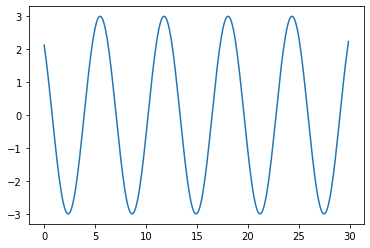

In [9]:
w=1
tiempos=np.arange(0,30,0.1)
volta=3*np.cos(w*tiempos+45*np.pi/180)
plt.plot(tiempos,volta)
#plt.grid()
#plt.xlabel('Tiempo (s)')
#plt.ylabel('Voltajes (V)')
plt.show()

## Ejercicios

Expresar los siguientes voltajes en forma fasorial:

i) $V(x,t)=10 \cos(10^8 t- 10 x+60^o)$

ii) $V(x,t)=6 e^{-3 x}\sin(\omega t - 2 x)$

Expresar los siguientes fasores en forma dependiente del tiempo:

i) $V=5 \jmath e^{-\jmath 20^o}$

ii) $V(z)= \sin(\pi z) e^{\jmath z}$

iii) $V(z)=10 e^{\jmath 2 \pi z/3} $